# Data Wrangling Project: WeRateDogs Twitter Archive

# I. Gathering Data

In [1]:
import numpy as np
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import matplotlib.dates as mdates

1. Manually download the **twitter archive enchanced csv file** from Udacity

In [2]:
#Open and check  twitter archive file
twit_arch= pd.read_csv('twitter-archive-enhanced.csv')
twit_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Make the column wider to read the whole text
pd.set_option('display.max_colwidth', 1)

In [4]:
twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. **Query Twitter Data** 


In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [6]:
# import file that contains my consumer_key, consumer_secret, access_token, and access_secret
import creds 
auth = tweepy.OAuthHandler(creds.consumer_key, creds.consumer_secret)
auth.set_access_token(creds.access_token, creds.access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
tweet_ids = twit_arch.tweet_id.values
len(tweet_ids)

2356

In [8]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
end = timer()

print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Rate limit reached. Sleeping for: 219


Success
610: 797545162159308800
Success
611: 797236660651966464
Success
612: 797165961484890113
Success
613: 796904159865868288
Success
614: 796865951799083009
Success
615: 796759840936919040
Success
616: 796563435802726400
Success
617: 796484825502875648
Success
618: 796387464403357696
Success
619: 796177847564038144
Success
620: 796149749086875649
Success
621: 796125600683540480
Success
622: 796116448414461957
Success
623: 796080075804475393
Success
624: 796031486298386433
Success
625: 795464331001561088
Success
626: 795400264262053889
Success
627: 795076730285391872
Success
628: 794983741416415232
Success
629: 794926597468000259
Success
630: 794355576146903043
Success
631: 794332329137291264
Success
632: 794205286408003585
Success
633: 793962221541933056
Success
634: 793845145112371200
Success
635: 793614319594401792
Success
636: 793601777308463104
Success
637: 793500921481273345
Success
638: 793286476301799424
Success
639: 793271401113350145
Success
640: 793256262322548741
Success


Success
867: 762035686371364864
Success
868: 761976711479193600
Success
869: 761750502866649088
Success
870: 761745352076779520
Success
871: 761672994376806400
Success
872: 761599872357261312
Success
873: 761371037149827077
Success
874: 761334018830917632
Success
875: 761292947749015552
Success
876: 761227390836215808
Success
877: 761004547850530816
Success
878: 760893934457552897
Success
879: 760656994973933572
Success
880: 760641137271070720
Success
881: 760539183865880579
Success
882: 760521673607086080
Success
883: 760290219849637889
Success
884: 760252756032651264
Success
885: 760190180481531904
Success
886: 760153949710192640
Success
887: 759943073749200896
Success
888: 759923798737051648
Success
889: 759846353224826880
Success
890: 759793422261743616
Success
891: 759566828574212096
Success
892: 759557299618865152
Success
893: 759447681597108224
Success
894: 759446261539934208
Success
895: 759197388317847553
Success
896: 759159934323924993
Success
897: 759099523532779520
Success


Success
1120: 731285275100512256
Success
1121: 731156023742988288
Success
1122: 730924654643314689
Success
1123: 730573383004487680
Success
1124: 730427201120833536
Success
1125: 730211855403241472
Success
1126: 730196704625098752
Success
1127: 729854734790754305
Success
1128: 729838605770891264
Success
1129: 729823566028484608
Success
1130: 729463711119904772
Success
1131: 729113531270991872
Success
1132: 728986383096946689
Success
1133: 728760639972315136
Success
1134: 728751179681943552
Success
1135: 728653952833728512
Success
1136: 728409960103686147
Success
1137: 728387165835677696
Success
1138: 728046963732717569
Success
1139: 728035342121635841
Success
1140: 728015554473250816
Success
1141: 727685679342333952
Success
1142: 727644517743104000
Success
1143: 727524757080539137
Success
1144: 727314416056803329
Success
1145: 727286334147182592
Success
1146: 727175381690781696
Success
1147: 727155742655025152
Success
1148: 726935089318363137
Success
1149: 726887082820554753
Success
11

Success
1369: 702539513671897089
Success
1370: 702332542343577600
Success
1371: 702321140488925184
Success
1372: 702276748847800320
Success
1373: 702217446468493312
Success
1374: 701981390485725185
Success
1375: 701952816642965504
Success
1376: 701889187134500865
Success
1377: 701805642395348998
Success
1378: 701601587219795968
Success
1379: 701570477911896070
Success
1380: 701545186879471618
Success
1381: 701214700881756160
Success
1382: 700890391244103680
Success
1383: 700864154249383937
Success
1384: 700847567345688576
Success
1385: 700796979434098688
Success
1386: 700747788515020802
Success
1387: 700518061187723268
Success
1388: 700505138482569216
Success
1389: 700462010979500032
Success
1390: 700167517596164096
Success
1391: 700151421916807169
Success
1392: 700143752053182464
Success
1393: 700062718104104960
Success
1394: 700029284593901568
Success
1395: 700002074055016451
Success
1396: 699801817392291840
Success
1397: 699788877217865730
Success
1398: 699779630832685056
Success
13

Rate limit reached. Sleeping for: 376


Fail
1510: 691459709405118465
Success
1511: 691444869282295808
Success
1512: 691416866452082688
Success
1513: 691321916024623104
Success
1514: 691096613310316544
Success
1515: 691090071332753408
Success
1516: 690989312272396288
Success
1517: 690959652130045952
Success
1518: 690938899477221376
Success
1519: 690932576555528194
Success
1520: 690735892932222976
Success
1521: 690728923253055490
Success
1522: 690690673629138944
Success
1523: 690649993829576704
Success
1524: 690607260360429569
Success
1525: 690597161306841088
Success
1526: 690400367696297985
Success
1527: 690374419777196032
Success
1528: 690360449368465409
Success
1529: 690348396616552449
Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540:

Success
1759: 678755239630127104
Success
1760: 678740035362037760
Success
1761: 678708137298427904
Success
1762: 678675843183484930
Success
1763: 678643457146150913
Success
1764: 678446151570427904
Success
1765: 678424312106393600
Success
1766: 678410210315247616
Success
1767: 678399652199309312
Success
1768: 678396796259975168
Success
1769: 678389028614488064
Success
1770: 678380236862578688
Success
1771: 678341075375947776
Success
1772: 678334497360859136
Success
1773: 678278586130948096
Success
1774: 678255464182861824
Success
1775: 678023323247357953
Success
1776: 678021115718029313
Success
1777: 677961670166224897
Success
1778: 677918531514703872
Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
17

Success
2008: 672264251789176834
Success
2009: 672256522047614977
Success
2010: 672254177670729728
Success
2011: 672248013293752320
Success
2012: 672245253877968896
Success
2013: 672239279297454080
Success
2014: 672231046314901505
Success
2015: 672222792075620352
Success
2016: 672205392827572224
Success
2017: 672169685991993344
Success
2018: 672160042234327040
Success
2019: 672139350159835138
Success
2020: 672125275208069120
Success
2021: 672095186491711488
Success
2022: 672082170312290304
Success
2023: 672068090318987265
Success
2024: 671896809300709376
Success
2025: 671891728106971137
Success
2026: 671882082306625538
Success
2027: 671879137494245376
Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
20

Success
2257: 667766675769573376
Success
2258: 667728196545200128
Success
2259: 667724302356258817
Success
2260: 667550904950915073
Success
2261: 667550882905632768
Success
2262: 667549055577362432
Success
2263: 667546741521195010
Success
2264: 667544320556335104
Success
2265: 667538891197542400
Success
2266: 667534815156183040
Success
2267: 667530908589760512
Success
2268: 667524857454854144
Success
2269: 667517642048163840
Success
2270: 667509364010450944
Success
2271: 667502640335572993
Success
2272: 667495797102141441
Success
2273: 667491009379606528
Success
2274: 667470559035432960
Success
2275: 667455448082227200
Success
2276: 667453023279554560
Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
22

In [9]:
# Read 'tweet_json.txt' file
df_json = pd.read_json('tweet_json.txt', orient = 'records', lines = True)

In [10]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2338 non-null datetime64[ns]
display_text_range               2338 non-null object
entities                         2338 non-null object
extended_entities                2064 non-null object
favorite_count                   2338 non-null int64
favorited                        2338 non-null bool
full_text                        2338 non-null object
geo                              0 non-null float64
id                               2338 non-null int64
id_str                           2338 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [11]:
# Create a dataframe
df_cleanjson = df_json[['id', 'favorite_count', 'retweet_count']]

3. Systemically download Image data file 

In [12]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [13]:
df_image = pd.read_csv('image-predictions.tsv',sep = '\t')

In [14]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# II. Assessing Data

In [15]:
# 1. Twitter archive 
twit_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [16]:
twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
sum(twit_arch.expanded_urls.duplicated())

137

In [18]:
twit_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [19]:
twit_arch.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [20]:
twit_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [21]:
# Check the rating_numerator that higher than 15
twit_arch_overnumerator = twit_arch.query('rating_numerator >= 15') 
twit_arch_overnumerator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


In [22]:
# find duplicated expanded_urls
twit_arch.expanded_urls.duplicated().sum()

137

In [23]:
# find  the number of status reply 
twit_arch.in_reply_to_status_id.notnull().sum()

78

In [24]:
# find  the number of retweeted status
twit_arch.retweeted_status_id.notnull().sum()

181

In [25]:
# Check if they have any xx/xx more than one value
twit_arch[twit_arch.text.str.contains(r'\d+\/\d+\D+\d+\/\d+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,"https://twitter.com/dog_rates/status/777684233540206592/photo/1,https://twitter.com/dog_rates/status/777684233540206592/photo/1",12,10,None,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268553605120/photo/1,8,10,Eve,None,None,pupper,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for 

- There are some data that contains more than one dog so the rating numerator and denominator are represent only the first one. It is difficult to clean for analyzing and it is not that much difference. Thus, I will not clean them.
- Data in index 1068,1165,1202,1459,1662,2335 : The first xx/xx pattern is invalid. It represent other things such as a date(dd/dd), the name of store(7/11), etc.

 # Quality
 
 - Timestamp should be changed from object datatype into datetime datatype
 - I will removed the row that in_reply_to_status_id != NaN because that row just retweet the old content
 - Due to text column, there are some rating_numerator should be float such as 75 should be 9.75 
 - The rating_numerator and rating_denominator of index 1068,1165,1202,1459,1662,2335 are invalids (i.e. date, 7/11, etc.)
 - There are too various rating_denominator. I will create the score out of ten column by using rating_numerator divided by rating_denominator and multiply by ten 
 - Check invalid score out of ten column (the new column) such as score out of ten <= 0
 - Removed duplicated expanded_urls data
 - Cleansing the data in source column to be more readable
 - There are some incorrect name such as 'a', 'an', 'the', etc.
 - Remove the column will not be used for analyzing : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, rating_numerator, rating_denominator 
 
# Tidiness
 - Merge all dog stages (doggo, floofer, pupper, puppo) into one column, and make a ‘multiple’ stage value for those tweet_id which contains more than 1 stage.

In [26]:
# 2. API Json Data
df_cleanjson.head()

,id,favorite_count,retweet_count
0,892420643555336193,37681,8213
1,892177421306343426,32358,6074
2,891815181378084864,24379,4015
3,891689557279858688,40995,8369
4,891327558926688256,39196,9073


In [27]:
df_cleanjson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 3 columns):
id                2338 non-null int64
favorite_count    2338 non-null int64
retweet_count     2338 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


# Quality
   - Rename id into tweet_id
    
# Tidiness
   - Merge df_arch_copy and df_cleanjson_copy

In [28]:
#  3. Image prediction data
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
sum(df_image.jpg_url.duplicated())

66

# Quality
   - Delete the duplicate jpg_url
   - Because I will use only p1 for analysis, I will remove unnecessary columns: img_num,p1_conf,p1_dog,p2, p2_conf, p2_dog, p3, p3_conf ,p3_dog
   - Make all dog breeds prediction of p1 into capitalize name
   - Rename p1 column to predict_dogbreed 
   
# Tidiness
   - Merge combine and df_image_copy table

# III. Cleansing Data

### 1. Enhanced table

In [31]:
# Make a copy of dataframe
df_arch_copy = twit_arch.copy()

## Quality

**Define** 

Change datatype of Timestamp column from object into datetime

**Code**

In [32]:
df_arch_copy['timestamp'] =  pd.to_datetime(df_arch_copy['timestamp'])

**Test**

In [33]:
df_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

**Define**

Remove the row that in_reply_to_status_id and retweeted_status_id  is not null 

**Code**

In [34]:
df_arch_copy = df_arch_copy.query('in_reply_to_status_id == "NaN"')
df_arch_copy  = df_arch_copy.query('retweeted_status_id == "NaN"')

**Test**

In [35]:
df_arch_copy.in_reply_to_status_id.notnull().sum()

0

In [36]:
df_arch_copy.retweeted_status_id.notnull().sum()

0

**Define** 

Change datatype of rating_numerator column from int64 into float64

**Code**

In [37]:
df_arch_copy.rating_numerator = df_arch_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True).astype(float)

**Test**

In [38]:
df_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), flo

In [39]:
df_arch_copy.query('rating_numerator >= 15') 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60.0,50,a,None,None,None,No

Some over-numerator can divided by denominator and be the valid value, some of them still be overrating. 

However,  text from tweet_id = 810984652412424192 show that 24/7 it is a time. Thus, I will change it manually into 0  

**Define**

Change numerator and denominator of tweet_id = 810984652412424192 into NaN

**Code**

In [40]:
# df_enhanced_copy['decimal_score'][516] = 0
df_arch_copy.loc[df_arch_copy['tweet_id'] == 810984652412424192, ['rating_numerator']] = 0
df_arch_copy.loc[df_arch_copy['tweet_id'] == 810984652412424192, ['rating_denominator']] = 0

**Test**

In [41]:
df_arch_copy.query('tweet_id == 810984652412424192')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",0.0,0,Sam,None,None,None,None


**Define**

Extract the second xx/xx pattern to rating_numerator and rating_denominator of index 1068,1165,1202,1459,1662,2335

**Code**

In [42]:
for i in [1068,1165,1202,1459,1662,2335] :
    text  = df_arch_copy.at[i, 'text']
    num = re.findall(r'\d+\/\d+\D+(\d+)\/\d+', text)[0]
    denom = re.findall(r'\d+\/\d+\D+\d+\/(\d+)', text)[0]
    df_arch_copy.at[i, 'rating_numerator'] = num
    df_arch_copy.at[i, 'rating_denominator'] = denom

**Test**

In [43]:
df_arch_copy.loc[[1068,1165,1202,1459,1662,2335],['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10
1459,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",13.0,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10.0,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10


**Define**

There are too various rating_denominator. I will create the score out of ten column by using rating_numerator divided by rating_denominator and multiply by ten

**Code**

In [44]:
df_arch_copy['score'] = df_arch_copy.rating_numerator / df_arch_copy.rating_denominator *10

**Test**

In [45]:
df_arch_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,None,None,None,13.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,None,None,None,None,13.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,None,None,None,None,12.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,None,None,None,None,13.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,None,None,None,None,12.0


**Define**

Check the invalid score which are lower than zero

**Code**

In [46]:
df_arch_copy.query('score <= 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10,None,None,None,None,None,0.0


In [47]:
## It posts about the plagiarism which not will be used in my analyzing so I will drop this row.
df_arch_copy.drop([315],inplace = True)

**Test**

In [48]:
df_arch_copy.query('score <= 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score


**Define**

Removed duplicated expanded url

**Code**

In [49]:
dup_url = df_arch_copy[df_arch_copy.duplicated(['expanded_urls'], keep = False)]

In [50]:
dup_url

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Beebop and Doobert should start a band 12/10 would listen,NaN,NaN,NaN,NaN,12.0,10,None,None,None,None,None,12.0
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14.0,10,None,None,None,None,None,14.0
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10.0,10,None,None,None,None,None,10.0
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10.0,10,None,None,None,pupper,None,10.0
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13.0,10,the,None,None,None,None,13.0


> Tweet id 791774931465953280 and 668587383441514497 are the same dog. They are rated in different scores and different years. Thus, I'll drop the recent one.

In [51]:
## Tweet id 791774931465953280 and 668587383441514497 are the same dog. They are just rated in different scores and different years. 
## Thus, I decide to drop the recent one.
df_arch_copy.drop([657],inplace = True)

In [52]:
#test
df_arch_copy.query('tweet_id == 791774931465953280')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score


**Define**

Cleansing the data in source column to be more readable

**Code**

In [53]:
df_arch_copy.source = df_arch_copy.source.str.replace(r'<(?:a\b[^>]*>|\/a>)', ' ') 

**Test**

In [54]:
df_arch_copy.source.value_counts()

 Twitter for iPhone      1963
 Vine - Make a Scene     90  
 Twitter Web Client      31  
 TweetDeck               11  
Name: source, dtype: int64

**Define**

There are some incorrect name such as 'a', 'an', 'the', etc. I will use string patterns like named * , and name is * to find the real dog name. (The pattern This is*, and , and Meet * is already used to detect name in this dataframe)

In [55]:
#  Check the name is* pattern
df_arch_copy[df_arch_copy.text.str.contains('name is')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,Twitter for iPhone,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14.0,10,None,None,None,None,None,14.0
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27,Twitter for iPhone,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811541651456/photo/1,13.0,10,None,None,None,None,puppo,13.0
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13.0,10,my,None,None,None,None,13.0
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29,Twitter for iPhone,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10.0,10,None,None,None,None,None,10.0
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56,Twitter for iPhone,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9.0,10,None,None,None,None,None,9.0
2267,667524857454854144,NaN,NaN,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12.0,10,None,None,None,None,None,12.0
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02,Twitter for iPhone,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8.0,10,a,None,None,None,None,8.0
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57,Twitter for iPhone,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10.0,10,Lugan,None,None,None,None,10.0


In [56]:
name_is = df_arch_copy[df_arch_copy.text.str.contains('name is ')]
for i in name_is.index:
    try:
        text =df_arch_copy.at[i, 'text']
        dog_name = re.findall(r'name\s+is\s+(\w+)', text)[0]
        df_arch_copy.at[i, 'name'] = dog_name 
    except  IndexError:
        continue

**Test**

In [57]:
df_arch_copy[df_arch_copy.text.str.contains('name is ')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,Twitter for iPhone,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14.0,10,Howard,None,None,None,None,14.0
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27,Twitter for iPhone,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811541651456/photo/1,13.0,10,Zoey,None,None,None,puppo,13.0
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13.0,10,Zoey,None,None,None,None,13.0
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29,Twitter for iPhone,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10.0,10,Thea,None,None,None,None,10.0
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56,Twitter for iPhone,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9.0,10,Sabertooth,None,None,None,None,9.0
2267,667524857454854144,NaN,NaN,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12.0,10,Big,None,None,None,None,12.0
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02,Twitter for iPhone,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8.0,10,Daryl,None,None,None,None,8.0
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57,Twitter for iPhone,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10.0,10,Rocky,None,None,None,None,10.0


In [58]:
#  tweet id 667524857454854144 : Change name into Big Jumpy Rat
df_arch_copy.loc[df_arch_copy['tweet_id'] == 667524857454854144, ['name']] = 'Big Jumpy Rat'
df_arch_copy.loc[df_arch_copy['tweet_id'] == 667524857454854144, ['name']]

,name
2267,Big Jumpy Rat


In [59]:
# The pattern This is* is already correct so I will rename it back to Lugan
df_arch_copy.loc[df_arch_copy['tweet_id'] == 666739327293083650, ['name']] = 'Lugan'
df_arch_copy.loc[df_arch_copy['tweet_id'] == 666739327293083650, ['name']]

,name
2313,Lugan


**Code**

In [60]:
#  Check the named* pattern
df_arch_copy[df_arch_copy.text.str.contains('named')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51,Twitter for iPhone,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10.0,10,a,None,None,None,None,10.0
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44,Twitter for iPhone,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10.0,10,a,None,None,None,None,10.0
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22,Twitter for iPhone,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11.0,10,a,None,None,None,None,11.0
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49,Twitter for iPhone,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9.0,10,a,None,None,None,None,9.0
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27,Twitter for iPhone,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9.0,10,a,None,None,None,None,9.0
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40,Twitter for iPhone,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9.0,10,a,None,None,None,None,9.0
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09,Twitter for iPhone,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9.0,10,a,None,None,None,None,9.0
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01,Twitter for iPhone,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10.0,10,a,None,None,None,None,10.0
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02,Twitter for iPhone,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10.0,10,a,None,None,None,None,10.0
2166,669363888236994561,NaN,NaN,2015-11-25 03:56:01,Twitter for iPhone,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669363888236994561/photo/1,10.0,10,None,None,None,None,None,10.0


In [61]:
named = df_arch_copy[df_arch_copy.text.str.contains('named')]
for i in named.index:
    try:
        text = df_arch_copy.at[i, 'text']
        dog_name = re.findall(r'named\s+(\w+)', text)[0]
        df_arch_copy.at[i, 'name'] = dog_name 
    except  IndexError:
        continue

**Test**

In [62]:
df_arch_copy[df_arch_copy.text.str.contains('named')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51,Twitter for iPhone,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10.0,10,Wylie,None,None,None,None,10.0
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44,Twitter for iPhone,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10.0,10,Kip,None,None,None,None,10.0
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22,Twitter for iPhone,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11.0,10,Jacob,None,None,None,None,11.0
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49,Twitter for iPhone,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9.0,10,Rufus,None,None,None,None,9.0
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27,Twitter for iPhone,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9.0,10,Spork,None,None,None,None,9.0
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40,Twitter for iPhone,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9.0,10,Cherokee,None,None,None,None,9.0
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09,Twitter for iPhone,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9.0,10,Hemry,None,None,None,None,9.0
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01,Twitter for iPhone,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10.0,10,Alphred,None,None,None,None,10.0
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02,Twitter for iPhone,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10.0,10,Alfredo,None,None,None,None,10.0
2166,669363888236994561,NaN,NaN,2015-11-25 03:56:01,Twitter for iPhone,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669363888236994561/photo/1,10.0,10,Zeus,None,None,None,None,10.0


**Code**

In [63]:
## Check  the lower-case name
lower_case = df_arch_copy[df_arch_copy.name.apply(lambda x: x.islower())]
lower_case 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14.0,10,such,None,None,None,None,14.0
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,Twitter for iPhone,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14.0,10,a,None,None,pupper,None,14.0
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12.0,10,quite,None,None,None,None,12.0
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12.0,10,quite,None,None,None,None,12.0
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57,Twitter Web Client,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10.0,10,not,None,None,None,None,10.0
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17,Twitter for iPhone,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14.0,10,one,None,None,None,None,14.0
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28,Twitter for iPhone,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11.0,10,incredibly,None,None,None,None,11.0
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31,Twitter for iPhone,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13.0,10,a,None,None,None,None,13.0
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12,Twitter for iPhone,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10.0,10,a,None,None,None,None,10.0
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18,Twitter for iPhone,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,NaN,NaN,NaN,https://twitter.com/dog_rates

In [64]:
# All text of lower-case name do not contain names so I will rename them to None
df_arch_copy.loc[df_arch_copy.name.apply(lambda x: x.islower()), ['name']] = 'None'

**Test**

In [65]:
df_arch_copy[df_arch_copy.name.apply(lambda x: x.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score


**Define**

Remove unnecessary columns that won't be used for analyzing : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, rating_numerator, rating_denominator 

**Code**

In [66]:
df_arch_copy.drop( columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','rating_numerator','rating_denominator'], inplace = True)

**Test**

In [67]:
df_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         2095 non-null int64
timestamp        2095 non-null datetime64[ns]
source           2095 non-null object
text             2095 non-null object
expanded_urls    2092 non-null object
name             2095 non-null object
doggo            2095 non-null object
floofer          2095 non-null object
pupper           2095 non-null object
puppo            2095 non-null object
score            2094 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 276.4+ KB


## Tidiness

**Define**

Merge all dog stages (doggo, floofer, pupper, puppo) into one column

**Code**

In [68]:
# I create a function to replace None value with 'NaN'
def stage(x):
    if x == 'None':
        return np.nan 
    else:
        return 1

In [69]:
# Apply those function to each stages
df_arch_copy.doggo= df_arch_copy.doggo.apply(stage)
df_arch_copy.floofer= df_arch_copy.floofer.apply(stage)
df_arch_copy.pupper= df_arch_copy.pupper.apply(stage)
df_arch_copy.puppo= df_arch_copy.puppo.apply(stage)

In [70]:
# Convert into new column called dog_stage
df_arch_copy['dog_stage'] = df_arch_copy.iloc[:, 6:10].idxmax(1)

**Test**

In [71]:
# Check df_arch_copy
df_arch_copy[['tweet_id', 'text', 'doggo', 'floofer','pupper', 'puppo','dog_stage']]

,tweet_id,text,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,NaN,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,NaN,NaN
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,NaN,NaN
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,NaN,NaN
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,1.0,NaN,NaN,NaN,doggo


In [72]:
df_arch_copy.query('tweet_id == 855851453814013952')

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,score,dog_stage
191,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,None,1.0,NaN,NaN,1.0,13.0,doggo


However, some tweets have multiple stages present in them i.e. tweet_id = 855851453814013952

**Define**

For tweet_id that contains more than 1 dog_satge, I will create 'multiple' variable in dog_stage column 

**Code**

In [73]:
# I will sum all those stages and return the values into a new column 'sum_stage'
def sum_stage(df_arch_copy):
    sum_column = df_arch_copy.loc[: , ['doggo', 'floofer', 'pupper', 'puppo']].sum(1)
    return df_arch_copy.assign(sum_stage = sum_column)
df_arch_copy =  sum_stage(df_arch_copy)

In [74]:
# Check value_counts of sum_stage
df_arch_copy.sum_stage.value_counts()

0.0    1759
1.0    325 
2.0    11  
Name: sum_stage, dtype: int64

11 tweet_id are multiple stages

In [75]:
# locate rows that sum_satge >= 2 and return 'multiple'  in dog_stages column
df_arch_copy.loc[df_arch_copy.sum_stage >= 2, ['dog_stage']] = 'multiple'

**Test**

In [76]:
df_arch_copy.query('sum_stage >= 2')[['tweet_id', 'text', 'doggo', 'floofer','pupper', 'puppo', 'dog_stage', 'sum_stage']]

,tweet_id,text,doggo,floofer,pupper,puppo,dog_stage,sum_stage
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,1.0,NaN,NaN,1.0,multiple,2.0
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",1.0,1.0,NaN,NaN,multiple,2.0
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",1.0,NaN,1.0,NaN,multiple,2.0
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,1.0,NaN,1.0,NaN,multiple,2.0
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,1.0,NaN,1.0,NaN,multiple,2.0
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,1.0,NaN,1.0,NaN,multiple,2.0
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",1.0,NaN,1.0,NaN,multiple,2.0
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",1.0,NaN,1.0,NaN,multiple,2.0
956,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,1.0,NaN,1.0,NaN,multiple,2.0
1063,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,1.0,NaN,1.0,NaN,multiple,2.0


After I read the text and go to see the picture in the link, I found out:
- 855851453814013952 is a puppo
- 854010172552949760 is a doggo
- 817777686764523521 is a pupper (doggo is a ig name)
- 801115127852503040 is a pupper
- 785639753186217984 is not a dog (it is a Porcupine)
- 751583847268179968 is a doggo on a couch

In [77]:
# 855851453814013952 is a puppo
df_arch_copy.loc[df_arch_copy['tweet_id'] == 855851453814013952, ['dog_stage']] = 'puppo'
df_arch_copy.loc[df_arch_copy['tweet_id'] == 855851453814013952, ['doggo']] = np.nan
df_arch_copy.loc[df_arch_copy['tweet_id'] == 855851453814013952, ['sum_stage']] =  1
#Test
df_arch_copy.query('tweet_id == 855851453814013952')

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,score,dog_stage,sum_stage
191,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,None,NaN,NaN,NaN,1.0,13.0,puppo,1.0


In [78]:
# 854010172552949760 is a doggo
df_arch_copy.loc[df_arch_copy['tweet_id'] == 854010172552949760 , ['dog_stage']] = 'doggo'
df_arch_copy.loc[df_arch_copy['tweet_id'] == 854010172552949760 , ['floofer']] =  np.nan
df_arch_copy.loc[df_arch_copy['tweet_id'] == 854010172552949760, ['sum_stage']] =  1
#Test
df_arch_copy.query('tweet_id == 854010172552949760')

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,score,dog_stage,sum_stage
200,854010172552949760,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",None,1.0,NaN,NaN,NaN,11.0,doggo,1.0


In [79]:
# 817777686764523521 is a pupper (doggo is a ig name)
df_arch_copy.loc[df_arch_copy['tweet_id'] == 817777686764523521 , ['dog_stage']] = 'pupper'
df_arch_copy.loc[df_arch_copy['tweet_id'] == 817777686764523521 , ['doggo']] =  np.nan
df_arch_copy.loc[df_arch_copy['tweet_id'] == 817777686764523521, ['sum_stage']] =  1
#Test
df_arch_copy.query('tweet_id == 817777686764523521')

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,score,dog_stage,sum_stage
460,817777686764523521,2017-01-07 16:59:28,Twitter for iPhone,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,Dido,NaN,NaN,1.0,NaN,13.0,pupper,1.0


In [80]:
# 801115127852503040 is a pupper
df_arch_copy.loc[df_arch_copy['tweet_id'] == 801115127852503040 , ['dog_stage']] = 'pupper'
df_arch_copy.loc[df_arch_copy['tweet_id'] == 801115127852503040, ['doggo']] =  np.nan
df_arch_copy.loc[df_arch_copy['tweet_id'] == 801115127852503040, ['sum_stage']] =  1
#Test
df_arch_copy.query('tweet_id == 801115127852503040')

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,score,dog_stage,sum_stage
575,801115127852503040,2016-11-22 17:28:25,Twitter for iPhone,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",Bones,NaN,NaN,1.0,NaN,12.0,pupper,1.0


In [81]:
# 785639753186217984 is not a dog (it is a Porcupine)
df_arch_copy.loc[df_arch_copy['tweet_id'] == 785639753186217984 , ['dog_stage']] = np.nan
df_arch_copy.loc[df_arch_copy['tweet_id'] == 785639753186217984, ['doggo', 'pupper']] =  np.nan
df_arch_copy.loc[df_arch_copy['tweet_id'] == 785639753186217984, ['sum_stage']] =  0
#Test
df_arch_copy.query('tweet_id == 785639753186217984')

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,score,dog_stage,sum_stage
705,785639753186217984,2016-10-11 00:34:48,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",Pinot,NaN,NaN,NaN,NaN,10.0,NaN,0.0


In [82]:
# 751583847268179968 is a doggo on a couch
df_arch_copy.loc[df_arch_copy['tweet_id'] == 751583847268179968 , ['dog_stage']] = 'doggo'
df_arch_copy.loc[df_arch_copy['tweet_id'] == 751583847268179968, ['pupper']] = np.nan
df_arch_copy.loc[df_arch_copy['tweet_id'] == 751583847268179968, ['sum_stage']] =  1
#Test
df_arch_copy.query('tweet_id == 751583847268179968')

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,score,dog_stage,sum_stage
956,751583847268179968,2016-07-09 01:08:47,Twitter for iPhone,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,None,1.0,NaN,NaN,NaN,5.0,doggo,1.0


In [83]:
df_arch_copy.dog_stage.value_counts()

pupper      223
doggo       74 
puppo       24 
floofer     9  
multiple    5  
Name: dog_stage, dtype: int64

**Define**

Drop doggo, floofer, pupper, puppo, sum_stage columns

**Code**

In [84]:
df_arch_copy.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo', 'sum_stage'], inplace = True)

**Test**

In [85]:
df_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2095 non-null int64
timestamp        2095 non-null datetime64[ns]
source           2095 non-null object
text             2095 non-null object
expanded_urls    2092 non-null object
name             2095 non-null object
score            2094 non-null float64
dog_stage        335 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 147.3+ KB


# 2. API Json Data

# Quality

In [86]:
# Make a copy of dataframe
df_cleanjson_copy =  df_cleanjson.copy()

**Define**

Change the column name id into tweet_id

**Code**

In [87]:
df_cleanjson_copy.rename(index = str, columns = {'id': 'tweet_id'}, inplace =  True)

**Test**

In [88]:
df_cleanjson_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2338 entries, 0 to 2337
Data columns (total 3 columns):
tweet_id          2338 non-null int64
favorite_count    2338 non-null int64
retweet_count     2338 non-null int64
dtypes: int64(3)
memory usage: 73.1+ KB


## Tidiness

**Defiine**

Merge df_arch_copy and df_cleanjson_copy

**Code**

In [89]:
combine = pd.merge(df_arch_copy, df_cleanjson_copy, on ='tweet_id', how = 'left')

**Test**

In [90]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2094
Data columns (total 10 columns):
tweet_id          2095 non-null int64
timestamp         2095 non-null datetime64[ns]
source            2095 non-null object
text              2095 non-null object
expanded_urls     2092 non-null object
name              2095 non-null object
score             2094 non-null float64
dog_stage         335 non-null object
favorite_count    2091 non-null float64
retweet_count     2091 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 180.0+ KB


# 3. Image prediction data 

In [91]:
df_image_copy = df_image.copy()

## Quality

**Define**

Delete the duplicate jpg_url

**Code**

In [92]:
df_image_copy["is_duplicate"]= df_image_copy.jpg_url.duplicated()

In [93]:
df_image_copy.query('is_duplicate == False',inplace = True)

**Test**

In [94]:
df_image_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_duplicate
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,False
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,False
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,False
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,False
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,False


**Define**

Remove unnecessary columns that won't be used in analyze

**Code**

In [95]:
df_image_copy.drop( columns = ['img_num', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'is_duplicate'], inplace = True)

**Test**

In [96]:
df_image_copy.head()

,tweet_id,jpg_url,p1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


**Define**

Make all dog breeds prediction of p1 into capitalize name

**Code**

In [97]:
df_image_copy.p1 = df_image_copy.p1.str.capitalize()

**Test**

In [98]:
sum(df_image_copy.p1.str.islower())

0

**Define**

Rename p1 column to predict_dogbreed

**Code**

In [99]:
df_image_copy.rename(index = str, columns = {'p1': 'predict_dogbreed'}, inplace =  True)

**Test**

In [100]:
df_image_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id            2009 non-null int64
jpg_url             2009 non-null object
predict_dogbreed    2009 non-null object
dtypes: int64(1), object(2)
memory usage: 62.8+ KB


## Tidiness

**Define**

Merge combine and df_image_copy table

**Code**

In [101]:
full_combine = pd.merge(combine, df_image_copy, on ='tweet_id', how = 'left')

**Test**

In [102]:
full_combine

,tweet_id,timestamp,source,text,expanded_urls,name,score,dog_stage,favorite_count,retweet_count,jpg_url,predict_dogbreed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0,NaN,37681.0,8213.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,NaN,32358.0,6074.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,NaN,24379.0,4015.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0,NaN,40995.0,8369.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,NaN,39196.0,9073.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,13.0,NaN,19704.0,3010.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,13.0,NaN,11524.0,1989.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,13.0,NaN,63547.0,18244.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,13.0,NaN,27092.0,4132.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,Cassie,14.0,doggo,31058.0,7132.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke


In [103]:
full_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2094
Data columns (total 12 columns):
tweet_id            2095 non-null int64
timestamp           2095 non-null datetime64[ns]
source              2095 non-null object
text                2095 non-null object
expanded_urls       2092 non-null object
name                2095 non-null object
score               2094 non-null float64
dog_stage           335 non-null object
favorite_count      2091 non-null float64
retweet_count       2091 non-null float64
jpg_url             1970 non-null object
predict_dogbreed    1970 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 212.8+ KB


# IV. Storing Data

In [104]:
full_combine.to_csv('twitter_archive_master.csv', index = False)

# V.  Analyzing and Visualizing Data 

In [105]:
# Open the twitter_archive_master.csv file
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,score,dog_stage,favorite_count,retweet_count,jpg_url,predict_dogbreed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0,NaN,37681.0,8213.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,NaN,32358.0,6074.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,NaN,24379.0,4015.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0,NaN,40995.0,8369.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,NaN,39196.0,9073.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 12 columns):
tweet_id            2095 non-null int64
timestamp           2095 non-null object
source              2095 non-null object
text                2095 non-null object
expanded_urls       2092 non-null object
name                2095 non-null object
score               2094 non-null float64
dog_stage           335 non-null object
favorite_count      2091 non-null float64
retweet_count       2091 non-null float64
jpg_url             1970 non-null object
predict_dogbreed    1970 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 196.5+ KB


In [107]:
df.describe()

,tweet_id,score,favorite_count,retweet_count
count,2.095000e+03,2094.000000,2091.000000,2091.000000
mean,7.364860e+17,11.661309,8691.187948,2680.325681
std,6.708835e+16,39.655451,12602.761748,4679.141150
min,6.660209e+17,1.000000,76.000000,11.000000
25%,6.768157e+17,10.000000,1934.500000,595.000000
50%,7.095662e+17,11.000000,3966.000000,1304.000000
75%,7.873602e+17,12.000000,10840.000000,3050.500000
max,8.924206e+17,1776.000000,162658.000000,82769.000000


**Insights**

   - The mean and median value of score are 11.66 and 11.00 respectively.
   - The mean and median value of favorite_count are 8691.19 and 3966.005 respectively.
   - The mean and median value of retweet_count are 2680.32 and 1304.00 respectively.

In [108]:
# Analyze the relationship between the datetime and score
# I want to know the change of rating system during November 2015 - September 2017

# Change the data type of timestamp column into datetime
df['timestamp'] =  pd.to_datetime(df['timestamp'])

In [109]:
#Check the score value counts
df.score.value_counts()

12.00      490
10.00      438
11.00      419
13.00      289
9.00       154
8.00       98 
7.00       51 
14.00      38 
5.00       33 
6.00       32 
3.00       19 
4.00       14 
2.00       9  
1.00       4  
11.26      1  
11.27      1  
420.00     1  
13.50      1  
9.75       1  
1776.00    1  
Name: score, dtype: int64

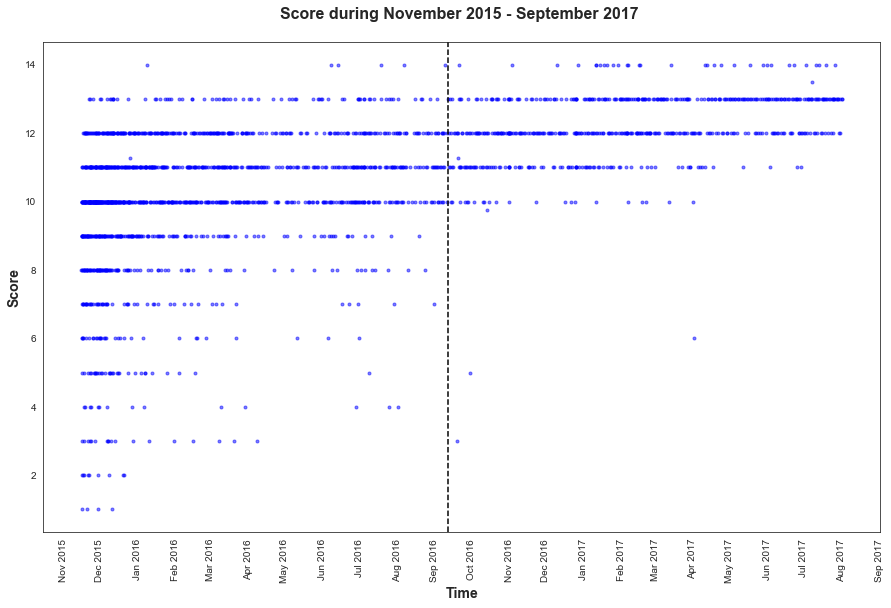

In [110]:
# Only score 120 and 1776 are outlier so I will remove them
sns.set_style('white')
corr_time =  df.query('score <= 15')
time = corr_time.timestamp
score = corr_time.score
fig, ax = plt.subplots(figsize = (15,9))
ax.plot_date(time, score, alpha = 0.5, ms = 3, c = 'blue')
plt.title('Score during November 2015 - September 2017 \n', fontsize=16, fontweight ='bold')
plt.xlabel('Time', fontsize=14, fontweight ='bold')
plt.ylabel('Score', fontsize=14, fontweight ='bold')
plt.xticks(rotation = 90)

# set dash line to see the trend after "they're good dogs Brent" become popular
plt.axvline('2016-09-12', lw =1.5, ls='dashed', color = 'black')

# set horizontal locator to month 
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b 20%y'));

The visualization shows the score system already rated dog higher than denominator since November 2015. However, low rating become smaller overtime, especially after "they're good dogs Brent" situation, they usually rate dog greater than or equal to 10.

In [111]:
# Then let's see which dog stages get the highest score 
# The frequency tweeted of Dog stage
stage_count = df.dog_stage.value_counts()

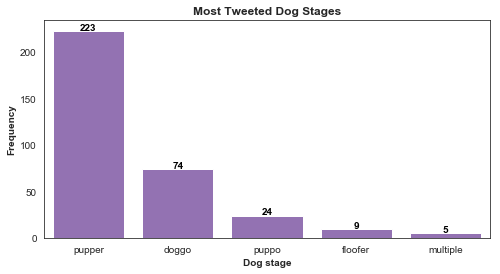

In [112]:
sns.set_style('white')
base_color = sns.color_palette()[4]
f, ax = plt.subplots(figsize=(8, 4))
sns.barplot(stage_count.index.values, stage_count, color = base_color)

plt.title('Most Tweeted Dog Stages', fontweight ='bold')
plt.xlabel('Dog stage', fontweight ='bold')
plt.ylabel('Frequency', fontweight ='bold')

# add annotations
n_points = df.shape[0]
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = stage_count[label.get_text()]
    pct_string = '{}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+ 1, pct_string, ha = 'center', color = 'black', fontweight ='bold')

In [113]:
# The number of tweets in each dog stages are so much different 
#so I will analyze rating on average.
stage_mean= df.groupby(['dog_stage'])['score'].mean().sort_values(ascending = False)
stage_mean

dog_stage
puppo       12.041667
multiple    12.000000
floofer     11.888889
doggo       11.743243
pupper      10.750090
Name: score, dtype: float64

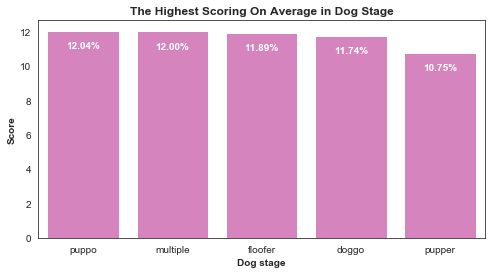

In [114]:
base_color = sns.color_palette()[6]
f, ax = plt.subplots(figsize=(8, 4))
sns.barplot(stage_mean.index.values, stage_mean , color = base_color)
plt.title('The Highest Scoring On Average in Dog Stage', fontweight ='bold')
plt.xlabel('Dog stage', fontweight ='bold')
plt.ylabel('Score', fontweight ='bold')

# add annotations
n_points = df.shape[0]
locs, labels = plt.xticks() 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = stage_mean[label.get_text()]
    pct_string = '{:0.2f}%'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count -1, pct_string, ha = 'center', color = 'w', fontweight ='bold')

   - The highest score dog stages is puppo

In [115]:
# Find the top ten dog breeds that get the most favorites count
dog_breed = df.groupby(['predict_dogbreed'])['favorite_count'].sum()
top10_fav = dog_breed.nlargest(10)

In [116]:
top10_fav = top10_fav.sort_values(ascending = True)
top10_fav

predict_dogbreed
Pomeranian            295254.0 
Cocker_spaniel        299766.0 
Pug                   303841.0 
Chow                  394807.0 
French_bulldog        453926.0 
Samoyed               498916.0 
Chihuahua             666970.0 
Pembroke              965098.0 
Labrador_retriever    1064792.0
Golden_retriever      1637825.0
Name: favorite_count, dtype: float64

In [117]:
# Change the unit of favorite count into millions
top10_fav = top10_fav/1000000

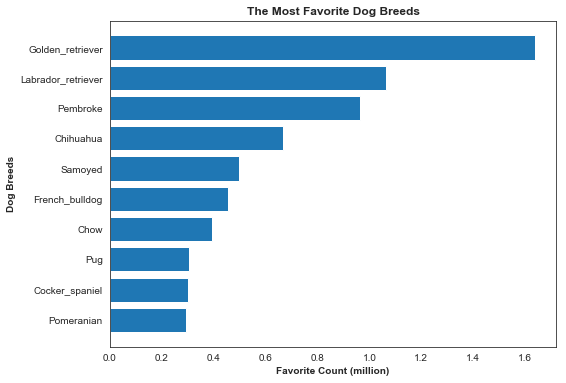

In [118]:
plt.figure(figsize=(8,6))
plt.barh(top10_fav.index, top10_fav)
plt.title('The Most Favorite Dog Breeds', fontweight ='bold')
plt.xlabel('Favorite Count (million)', fontweight ='bold')
plt.ylabel('Dog Breeds', fontweight ='bold');

In [119]:
# Find the top ten dog breeds that get the most retweet count
retweet_dogbreed = df.groupby(['predict_dogbreed'])['retweet_count'].sum()
top10_retweet = retweet_dogbreed.nlargest(10)

In [120]:
top10_retweet= top10_retweet.sort_values(ascending = True)
top10_retweet

predict_dogbreed
Eskimo_dog            92254.0 
Cocker_spaniel        93813.0 
Pomeranian            101668.0
Chow                  111106.0
French_bulldog        113884.0
Samoyed               164215.0
Chihuahua             212477.0
Pembroke              263851.0
Labrador_retriever    342035.0
Golden_retriever      473716.0
Name: retweet_count, dtype: float64

In [121]:
# Change the unit of favorite count into hundred thousands
top10_retweet = top10_retweet/100000

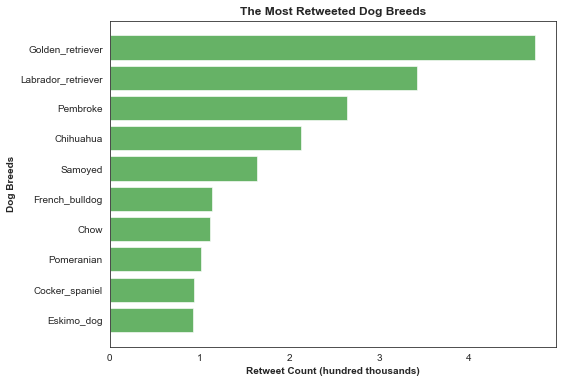

In [122]:
plt.figure(figsize=(8,6))
plt.barh(top10_retweet.index, top10_retweet, color = 'green', alpha = 0.6)
plt.title('The Most Retweeted Dog Breeds', fontweight ='bold')
plt.xlabel('Retweet Count (hundred thousands)', fontweight ='bold')
plt.ylabel('Dog Breeds', fontweight ='bold');

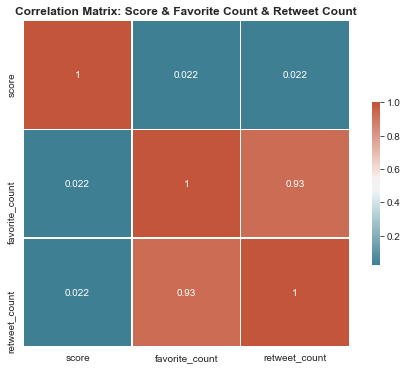

In [123]:
# Find the correlation between Score & Favorite Count & Retweet Count
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df[['score', 'favorite_count', 'retweet_count']].corr(), cmap=sns.diverging_palette(220, 20, sep=20,as_cmap=True), 
            annot = True, square=True, linewidths= 0.5, cbar_kws={"shrink": 0.5})
plt.title('Correlation Matrix: Score & Favorite Count & Retweet Count', fontweight ='bold');

  - There are strong correlation between favorite_count and retweet_count (Correlation = 0.93)
  - This strong relationship also support our previous analyze that dog breed highest favorite count and retweet count are almost the same breed
  - Both favorite count and retweet count has nearly zero correlation with score